# Case Study: Pancreatic Endocrinogenesis

In [1]:
import os
import glob
import random
import sys
# import from absolute directory
srcdir = '/Users/pengzhizhang/cellDancer/src'
srcdir = '/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/bin/cellDancer_polish/src'
sys.path.append(srcdir)

import matplotlib.pyplot as plt
import pandas as pd
import cdplt


## velocity estimation

In [2]:
# import celldancer.velocity_estimation as calc_velocity
import sys
srcdir = '/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/bin/cellDancer_polish/src'
sys.path.append(srcdir)
import pandas as pd
import sys
from plotting import gene as cdpl_gene
from plotting import gene as cdpl_cell
from plotting.colormap import *
from celldancer import velocity_estimation

In [8]:
raw_path='/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/data/raw_data/pancreatic_endocrinogenesis.csv'
load_raw_data=pd.read_csv(raw_path)
load_raw_data

,gene_name,u0,s0,cellID,clusters,embedding1,embedding2
0,Sntg1,0.045809,0.000000,Pre-endocrine,AAACCTGAGAGGGATA,6.143066,-0.063644
1,Sntg1,0.058600,0.000000,Ductal,AAACCTGAGCCTTGAT,-9.906417,0.197778
2,Sntg1,0.058696,0.000000,Alpha,AAACCTGAGGCAATTA,7.559791,0.583762
3,Sntg1,0.198549,0.000000,Ductal,AAACCTGCATCATCCC,-11.283765,4.218998
4,Sntg1,0.000000,0.000000,Ngn3 high EP,AAACCTGGTAAGTGGC,1.721565,-4.753407
...,...,...,...,...,...,...,...
7391995,Erdr1,0.461130,0.505213,Pre-endocrine,TTTGTCAAGTGACATA,4.768472,-1.388353
7391996,Erdr1,0.643907,0.531752,Ngn3 high EP,TTTGTCAAGTGTGGCA,-1.873335,-4.182650
7391997,Erdr1,0.626258,0.406073,Ductal,TTTGTCAGTTGTTTGG,-9.882250,-0.105594
7391998,Erdr1,0.409493,0.514864,Alpha,TTTGTCATCGAATGCT,6.612424,4.531895


In [3]:
gene_list=["Ank","Abcc8","Tcp11","Nfib","Ppp3ca",
        "Rbfox3","Cdk1","Gng12","Map1b","Cpe",
        "Gnao1","Pcsk2","Tmem163","Pak3","Wfdc15b",
        "Nnat","Anxa4","Actn4","Btbd17","Dcdc2a",
        "Adk","Smoc1","Mapre3","Pim2","Tspan7",
        "Top2a","Rap1b","Sulf2"]

In [11]:
result_path = '/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/data/pancreas/velocity_result/polish/'
brief, load_cellDancer=velocity_estimation.train(load_raw_data,gene_choice=gene_list,result_path=result_path,n_jobs=8)

Using /Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/data/pancreas/velocity_result/polish/cell_dancer_velocity_2022-04-28 12-37-28 as the output path.


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{}
--------------------------------------------------------------------------------


Velocity Estimation:   0%|                               | 0/28 [00:00<?, ?it/s]GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
Velocity Estimation:   4%|▊     

## Set Parameters

In [6]:
n_neighbors=100 #100
downsample_step=(60,60)

grid=(20,20)
dt = 0.01
t_total = 10000
n_repeats = 10

## Load detail

In [4]:
detail_result_path = '/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/data/pancreas/velocity_result/velocity_result_all_genes_with_bin/2000_smooth/combined_detail'
output_path = os.getcwd()
detail_file = os.path.join(detail_result_path,'combined_detail.csv')
load_cellDancer=pd.read_csv(detail_file)

In [7]:
from compute_cell_velocity import compute_cell_velocity

gene_choice=list(set(load_cellDancer.gene_name))
compute_cell_velocity(load_cellDancer=load_cellDancer,
              gene_list=gene_choice,
              mode="gene",
              transfer_mode='power10',
              n_neighbors=n_neighbors,
              step=downsample_step)

/Users/shengyuli/anaconda3/envs/celldancer_env/lib/python3.7/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


(2000, 3696)
(2000, 3696)


/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/bin/cellDancer_polish/src/compute_cell_velocity.py:142: RuntimeWarning: invalid value encountered in true_divide
  np.sqrt(np.dot(ematrix_ss[:, None], vmatrix_ss[None]))


after downsampling, there are  846 cells.


In [8]:
load_cellDancer

,cellIndex,gene_name,s0,u0,s1,u1,alpha,beta,gamma,cost,clusters,cellID,embedding1,embedding2,index,velocity1,velocity2
0,0,2010107G23Rik,0.645871,0.000000,0.631752,0.000444,0.004090,0.033074,0.143236,0.085577,Pre-endocrine,AAACCTGAGAGGGATA,6.143066,-0.063644,0,-0.018067,0.207249
1,1,2010107G23Rik,0.659958,0.050844,0.667935,0.049499,0.002315,0.013641,0.159593,0.085577,Ductal,AAACCTGAGCCTTGAT,-9.906417,0.197778,1,-0.194755,-0.393044
2,2,2010107G23Rik,0.536477,0.031027,0.543241,0.030047,0.002852,0.018068,0.154822,0.085577,Alpha,AAACCTGAGGCAATTA,7.559791,0.583762,2,NaN,NaN
3,3,2010107G23Rik,0.172749,0.000000,0.168829,0.000422,0.003884,0.025258,0.148675,0.085577,Ductal,AAACCTGCATCATCCC,-11.283765,4.218998,3,-0.288228,0.513889
4,4,2010107G23Rik,2.669759,0.024144,2.671663,0.020978,0.003705,0.064247,0.127344,0.085577,Ngn3 high EP,AAACCTGGTAAGTGGC,1.721565,-4.753407,4,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7391995,3691,Zfp949,0.175796,0.175190,0.163429,0.174457,0.209083,0.203498,0.271190,0.043265,Pre-endocrine,TTTGTCAAGTGACATA,4.768472,-1.388353,3691,NaN,NaN
7391996,3692,Zfp949,0.078194,0.130215,0.086273,0.142232,0.216891,0.203658,0.268408,0.043265,Ngn3 high EP,TTTGTCAAGTGTGGCA,-1.873335,-4.182650,3692,NaN,NaN
7391997,3693,Zfp949,0.000000,0.044002,0.011225,0.076212,0.210932,0.204190,0.266029,0.043265,Ductal,TTTGTCAGTTGTTTGG,-9.882250,-0.105594,3693,NaN,NaN
7391998,3694,Zfp949,0.041343,0.086365,0.050158,0.108793,0.214619,0.203931,0.267263,0.043265,Alpha,TTTGTCATCGAATGCT,6.612424,4.531895,3694,NaN,NaN


## Estimate pseudotime

In [ ]:
#import importlib
#importlib.reload(sys.modules['pseudo_time'])
from pseudo_time import pseudo_time


cell_time = dict()
dt = 0.01
t_total = {dt:int(10/dt)} 
n_repeats = 10
grid = (20,20)
pseudo_time(load_cellDancer, grid, dt, t_total[dt], n_repeats, downsample_step)

In [ ]:
load_cellDancer

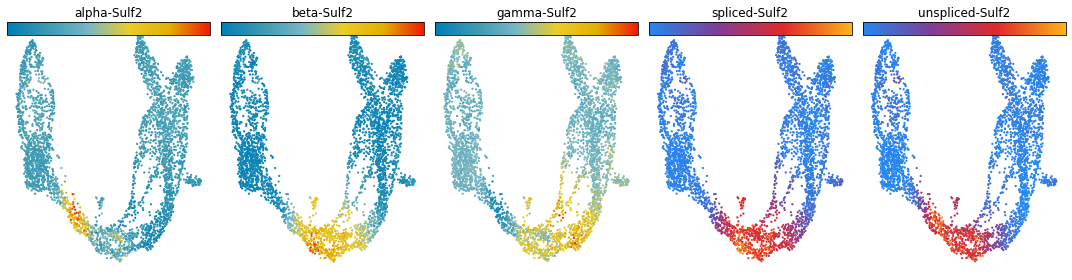

In [10]:
import cdplt
fig, ax = plt.subplots(ncols=5, figsize=(15,4))
gene = 'Sulf2'
cdplt.cell.scatter_cell(ax[0],load_cellDancer, colors='alpha', 
             gene_name=gene, velocity=False, alpha=1)
cdplt.cell.scatter_cell(ax[1],load_cellDancer, colors='beta', 
             gene_name=gene, velocity=False, alpha=1)
cdplt.cell.scatter_cell(ax[2],load_cellDancer, colors='gamma', 
             gene_name=gene, velocity=False, alpha=1)
cdplt.cell.scatter_cell(ax[3],load_cellDancer, colors='spliced', 
             gene_name=gene, velocity=False, alpha=1)
cdplt.cell.scatter_cell(ax[4],load_cellDancer, colors='unspliced', 
             gene_name=gene, velocity=False, alpha=1)
ax[0].axis('off')
ax[1].axis('off')
ax[2].axis('off')
ax[3].axis('off')
ax[4].axis('off')
ax[0].set_title('alpha-'+gene)
ax[1].set_title('beta-'+gene)
ax[2].set_title('gamma-'+gene)
ax[3].set_title('spliced-'+gene)
ax[4].set_title('unspliced-'+gene)
plt.tight_layout()
plt.show()

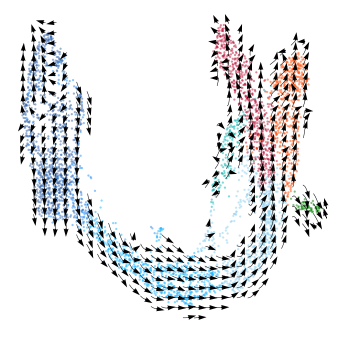

In [15]:
fig, ax = plt.subplots(figsize=(6,6))
clusters = load_cellDancer['clusters'].drop_duplicates().to_list()
cdplt.cell.scatter_cell(ax,load_cellDancer, colors=colormap_pancreas, alpha=0.5, 
             gene_name=gene, velocity=True)
ax.axis('off')
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))
clusters = load_cellDancer['clusters'].drop_duplicates().to_list()
cdplt.cell.scatter_cell(ax,load_cellDancer, colors='pseudotime', alpha=0.5, 
             gene_name=gene, velocity=False, custom_xlim=(-5,11), custom_ylim=(4,18))
ax.axis('off')
plt.show()

KeyError: "['pseudotime'] not in index"

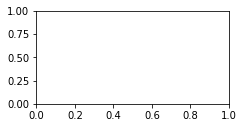

In [17]:
from plotting import colormap
import math
ncols=5
fig = plt.figure(figsize=(20,12))
gene_list=["Ank","Abcc8","Tcp11","Nfib","Ppp3ca",
        "Rbfox3","Cdk1","Gng12","Map1b","Cpe",
        "Gnao1","Pcsk2","Tmem163","Pak3","Wfdc15b",
        "Nnat","Anxa4","Actn4","Btbd17","Dcdc2a",
        "Adk","Smoc1","Mapre3","Pim2","Tspan7",
        "Top2a","Rap1b","Sulf2"]
load_cellDancer
for i in range(len(gene_list)):
    ax = fig.add_subplot(math.ceil(len(gene_list)/ncols), ncols, i+1)
    cdplt.gene.scatter_gene(
        ax=ax,
        x='pseudotime',
        y='s0',
        load_cellDancer=load_cellDancer,
        save_path=None,
        custom_xlim=None,
        custom_ylim=None,
        colors=colormap_pancreas,
        alpha=0.5, 
        s = 5,
        velocity=False,
        gene_name=gene_list[i])

    ax.set_title(gene_list[i])
    ax.axis('off')

plt.show()


KeyError: "['pseudotime'] not in index"

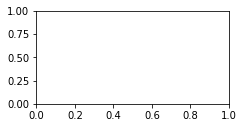

In [18]:
from plotting import colormap
ncols=5
fig = plt.figure(figsize=(20,12))
import math
load_cellDancer
for i in range(len(gene_list)):
    ax = fig.add_subplot(math.ceil(len(gene_list)/ncols), ncols, i+1)
    cdplt.gene.scatter_gene(
        ax=ax,
        x='pseudotime',
        y='s0',
        load_cellDancer=load_cellDancer,
        save_path=None,
        custom_xlim=None,
        custom_ylim=None,
        colors=colormap.colormap_neuro,
        alpha=0.5, 
        s = 5,
        velocity=False,
        gene_name=gene_list[i])

    ax.set_title(gene_list[i])
    ax.axis('off')

plt.show()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


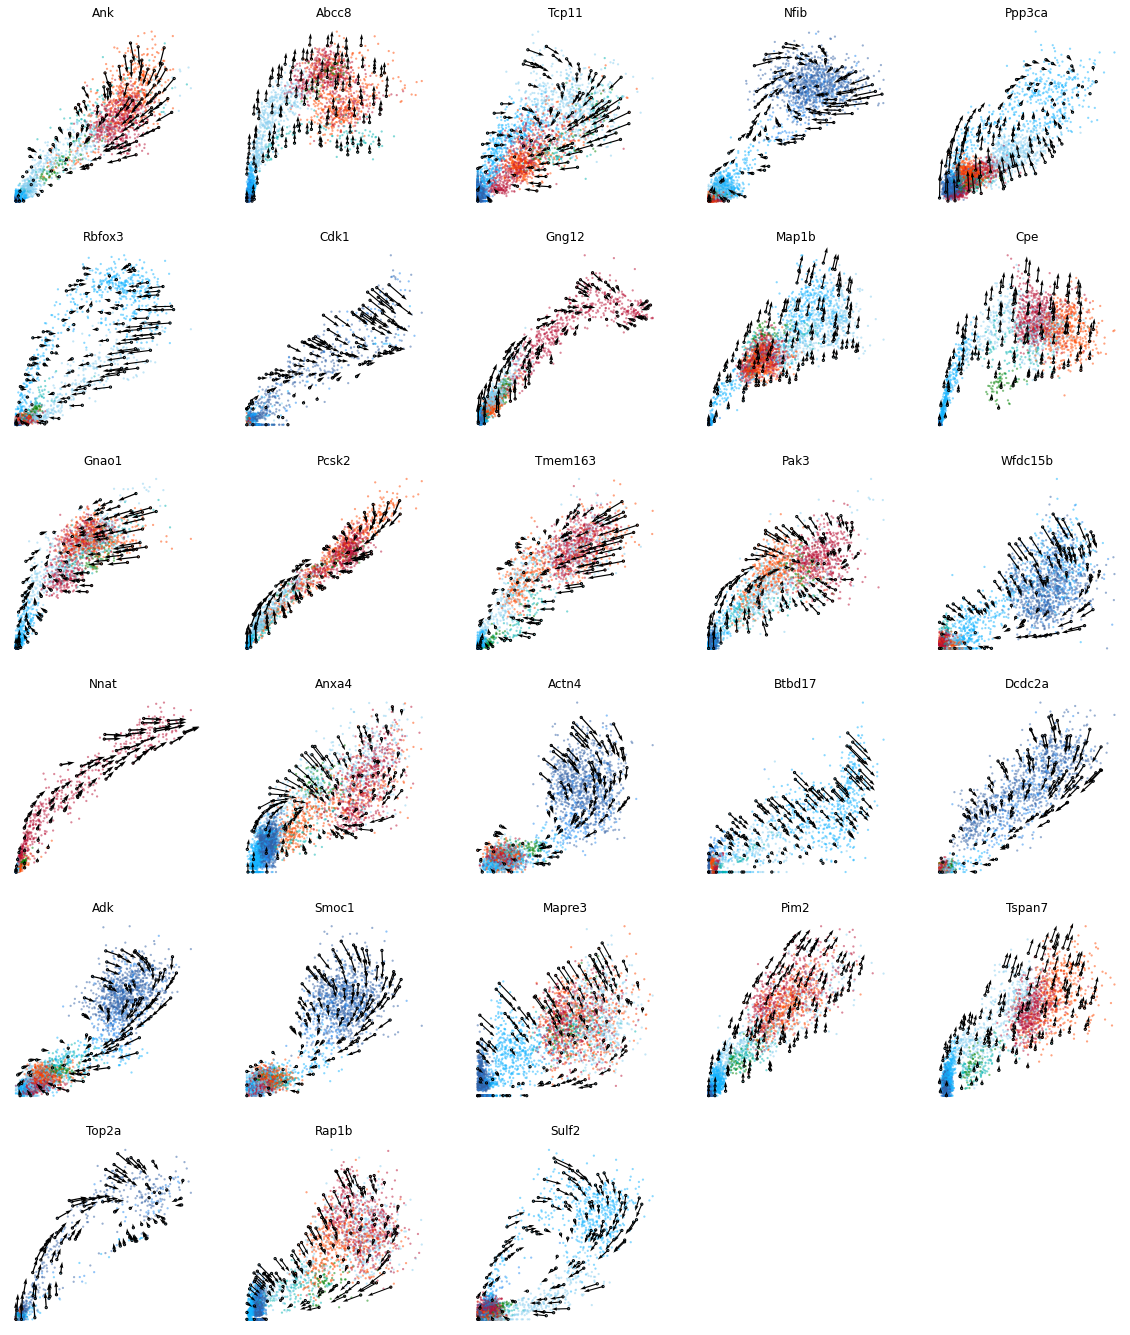

In [22]:
%load_ext autoreload
%autoreload 2

ncols=5
fig = plt.figure(figsize=(20,24))


for i in range(len(gene_list)):
    ax = fig.add_subplot(math.ceil(len(gene_list)/ncols), ncols, i+1)
    cdplt.gene.scatter_gene(
        ax=ax,
        x='spliced',
        y='unspliced',
        load_cellDancer=load_cellDancer,
        save_path=None,
        custom_xlim=None,
        custom_ylim=None,
        colors=colormap.colormap_pancreas,
        alpha=0.5, 
        s = 5,
        velocity=True,
        gene_name=gene_list[i])
    
    ax.set_title(gene_list[i])
    ax.axis('off')

plt.show()


## Rsquare rank

In [18]:
%load_ext autoreload
%autoreload 2

from utilities import *

cluster_choice=['Blood progenitors 1','Blood progenitors 2','Erythroid1','Erythroid2','Erythroid3']
rsquare_rank=rank_rsquare(load_cellDancer,gene_list=gene_list,cluster_choice=cluster_choice)
rsquare_rank

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Calculate rsquare: 100%|████████████████████████| 13/13 [00:08<00:00,  1.52it/s]


,gene_name,r_square
0,Hba-x,0.992753
1,Blvrb,0.992749
2,Mllt3,0.982714
3,Smim1,0.977385
4,Skap1,0.940685
5,Snca,0.866329
6,Smarca2,0.844709
7,Yipf5,0.840429
8,Nfkb1,0.804476
9,Phc2,0.711426


In [ ]:
%load_ext autoreload
%autoreload 2

## UMAP using alpha, beta, and gamma

In [26]:
load_cellDancer=calculate_para_umap(load_cellDancer,'alpha')

OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [27]:
load_cellDancer=calculate_para_umap(load_cellDancer,'beta')

In [28]:
load_cellDancer=calculate_para_umap(load_cellDancer,'gamma')

In [29]:
load_cellDancer=calculate_para_umap(load_cellDancer,'alpha_beta_gamma')

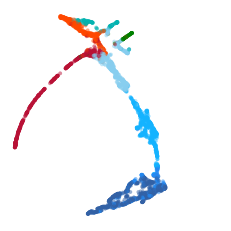

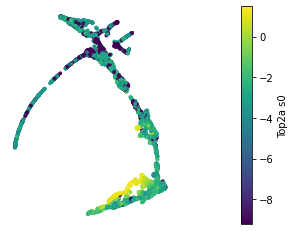

In [49]:
plot_para_umap('alpha',load_cellDancer,cluster_map=cdplt.colormap.colormap_pancreas ,save_path=None,title=None)
plot_para_umap('alpha',load_cellDancer,gene_name='Top2a',cluster_map=cdplt.colormap.colormap_pancreas ,save_path=None,title=None)

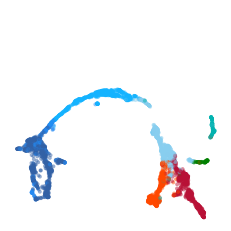

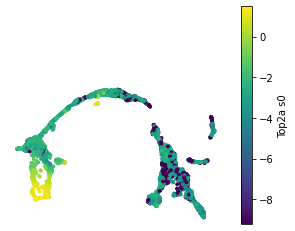

In [50]:
plot_para_umap('beta',load_cellDancer,cluster_map=cdplt.colormap.colormap_pancreas ,save_path=None,title=None)
plot_para_umap('beta',load_cellDancer,gene_name='Top2a',cluster_map=cdplt.colormap.colormap_pancreas ,save_path=None,title=None)

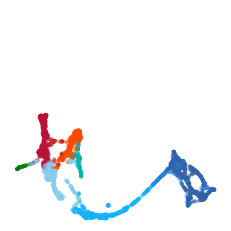

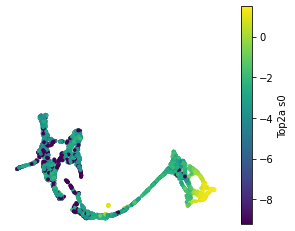

In [51]:
plot_para_umap('gamma',load_cellDancer,cluster_map=cdplt.colormap.colormap_pancreas ,save_path=None,title=None)
plot_para_umap('gamma',load_cellDancer,gene_name='Top2a',cluster_map=cdplt.colormap.colormap_pancreas ,save_path=None,title=None)

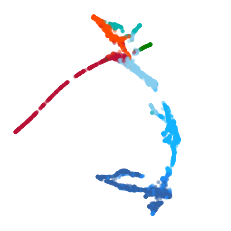

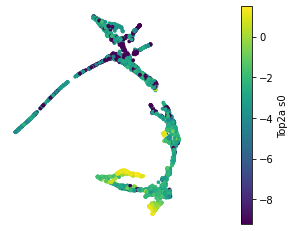

In [52]:
plot_para_umap('alpha_beta_gamma',load_cellDancer,cluster_map=cdplt.colormap.colormap_pancreas ,save_path=None,title=None)
plot_para_umap('alpha_beta_gamma',load_cellDancer,gene_name='Top2a',cluster_map=cdplt.colormap.colormap_pancreas ,save_path=None,title=None)

In [48]:
def calculate_para_umap(load_cellDancer,para,umap_n=25):
    
    import umap
    if set([(para+'_umap1'),(para+'_umap2')]).issubset(load_cellDancer.columns):
        load_cellDancer=load_cellDancer.drop(columns=[(para+'_umap1'),(para+'_umap2')])
        
    if para=='alpha' or para=='beta' or para=='gamma':
        para_df=load_cellDancer.pivot(index='cellIndex', columns='gene_name', values=para)
    elif para=='alpha_beta_gamma':
        alpha_df=load_cellDancer.pivot(index='cellIndex', columns='gene_name', values='alpha')
        beta_df=load_cellDancer.pivot(index='cellIndex', columns='gene_name', values='beta')
        gamma_df=load_cellDancer.pivot(index='cellIndex', columns='gene_name', values='gamma')
        para_df=pd.concat([alpha_df,beta_df,gamma_df],axis=1)
    else:
        print('para should be set in one of alpha, beta, gamma, or alpha_beta_gamma.')

    def get_umap(df,n_neighbors=umap_n, min_dist=0.1, n_components=2, metric='euclidean'): 
        fit = umap.UMAP(
            n_neighbors=n_neighbors,
            min_dist=min_dist,
            n_components=n_components,
            metric=metric
        )
        embed = fit.fit_transform(df);
        return(embed)
    umap_para=get_umap(para_df)
    umap_info=pd.DataFrame(umap_para,columns=[(para+'_umap1'),(para+'_umap2')])

    gene_amt=len(load_cellDancer.gene_name.drop_duplicates())
    umap_col=pd.concat([umap_info]*gene_amt)
    umap_col.index=load_cellDancer.index
    load_cellDancer=pd.concat([load_cellDancer,umap_col],axis=1)
    return(load_cellDancer)

def plot_para_umap(para,load_cellDancer,gene_name=None,umap_n=25,cluster_map=None,save_path=None,title=None,legend_annotation=False):
    import numpy as np
    onegene=load_cellDancer[load_cellDancer.gene_name==load_cellDancer.gene_name[0]]
    umap_para=onegene[[(para+'_umap1'),(para+'_umap2')]].to_numpy()
    onegene_cluster_info=onegene.clusters
    
    if gene_name is None:
        if cluster_map is None:
            from plotting.colormap import build_colormap
            cluster_map=build_colormap(onegene_cluster_info)

        colors = list(map(lambda x: cluster_map.get(x, 'black'), onegene_cluster_info))

        if legend_annotation:
            markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in cluster_map.values()]
            lgd=plt.legend(markers, cluster_map.keys(), numpoints=1,loc='upper left',bbox_to_anchor=(1.01, 1))

        plt.scatter(umap_para[:,0], umap_para[:,1],c=colors,s=15,alpha=0.5,edgecolor="none")
        plt.axis('square')
        plt.axis('off')
    
    else:
        onegene=load_cellDancer[load_cellDancer.gene_name==gene_name]
        plt.figure()
        plt.scatter(umap_para[:,0], umap_para[:,1],c=np.log(onegene.s0+0.0001),s=15,alpha=1,edgecolor="none")
        plt.axis('square')
        plt.axis('off')
        plt.colorbar(label=gene_name+" s0")
        
    if save_path is not None:
        plt.savefig(save_path,bbox_inches='tight',bbox_extra_artists=(lgd,))
    umap_df=pd.concat([pd.DataFrame({'umap1':umap_para[:,0],'umap2':umap_para[:,1]})],axis=1)